In [70]:
import tgju_crawl as tg

In [71]:
df = tg.get_df_of_symbols()

/Users/amirosein/opt/anaconda3/envs/quera/lib/python3.9/site-packages/tgju_crawl/__init__.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc['طلای دست دوم']['symbol_En'] = 'gold_mini_size'


In [72]:
df.to_excel('df.xlsx')

In [73]:
df

,symbol_En,SYMBOL
symbol_Fa,,
مثقال طلا,mesghal,MESGHAL
طلای 18 عیار,geram18,GERAM18
طلای 24 عیار,geram24,GERAM24
طلای دست دوم,technical,TECHNICAL
دلار,price_dollar_rl,PRICE_DOLLAR_RL
...,...,...
میدان نفتی الشاهین قطر,al-shaheen-qatar-1,AL-SHAHEEN-QATAR-1
نفت کوا آیبو,qua-iboe-1,QUA-IBOE-1
میدان براس ریور,brass-river-1,BRASS-RIVER-1


In [74]:

gold_price = tg.get_tgju_data(symbol = 'طلای 18 عیار')


/Users/amirosein/opt/anaconda3/envs/quera/lib/python3.9/site-packages/tgju_crawl/__init__.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc['طلای دست دوم']['symbol_En'] = 'gold_mini_size'


In [75]:
btc_price = tg.get_tgju_data(symbol = 'بیت کوین')

/Users/amirosein/opt/anaconda3/envs/quera/lib/python3.9/site-packages/tgju_crawl/__init__.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc['طلای دست دوم']['symbol_En'] = 'gold_mini_size'


In [76]:
eur_price = tg.get_tgju_data(symbol = 'یورو')

/Users/amirosein/opt/anaconda3/envs/quera/lib/python3.9/site-packages/tgju_crawl/__init__.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc['طلای دست دوم']['symbol_En'] = 'gold_mini_size'


In [77]:
eur_price

,Date,Weekday,Open,High,Low,Close,Symbol
J-Date,,,,,,,
1391-04-08,2012-06-28,Thursday,25250,25250,25250,25250,یورو
1391-04-09,2012-06-29,Friday,25200,25200,25000,25150,یورو
1391-04-10,2012-06-30,Saturday,25100,25100,24850,24950,یورو
1391-04-11,2012-07-01,Sunday,24850,24850,24700,24700,یورو
1391-04-12,2012-07-02,Monday,24720,24890,24700,24890,یورو
...,...,...,...,...,...,...,...
1403-05-07,2024-07-28,Sunday,637500,642800,637400,641500,یورو
1403-05-08,2024-07-29,Monday,641100,644000,638400,642100,یورو
1403-05-09,2024-07-30,Tuesday,642500,645800,640900,643300,یورو


In [78]:
btc_eur = pd.read_csv('BTC-EUR.csv')

In [80]:
btc_eur['Date'] = pd.to_datetime(btc_eur['Date'])
eur_price['Date'] = pd.to_datetime(eur_price['Date'])

result = pd.merge(btc_eur, eur_price, on='Date', how='left', suffixes=('_btc', '_eur'))


In [81]:
result = result[['Date', 'Close_btc', 'Close_eur']]

In [82]:
result

,Date,Close_btc,Close_eur
0,2014-09-17,355.957367,41680.0
1,2014-09-18,328.539368,NaN
2,2014-09-19,307.761139,41300.0
3,2014-09-20,318.758972,41240.0
4,2014-09-21,310.632446,41160.0
...,...,...,...
3630,2024-07-30,61759.644531,643300.0
3631,2024-07-31,61208.531250,653200.0
3632,2024-08-01,59700.820313,659100.0
3633,2024-08-02,60592.808594,NaN


In [83]:
result = result.dropna()

In [84]:
result['btc_rial'] = result['Close_btc'] * result['Close_eur']

/var/folders/hg/h4r5pwgd6q11lyngyfsf63fr0000gn/T/ipykernel_2096/358881957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['btc_rial'] = result['Close_btc'] * result['Close_eur']


In [85]:
result

,Date,Close_btc,Close_eur,btc_rial
0,2014-09-17,355.957367,41680.0,1.483630e+07
2,2014-09-19,307.761139,41300.0,1.271054e+07
3,2014-09-20,318.758972,41240.0,1.314562e+07
4,2014-09-21,310.632446,41160.0,1.278563e+07
5,2014-09-22,312.958771,41370.0,1.294710e+07
...,...,...,...,...
3628,2024-07-28,62377.152344,641500.0,4.001494e+10
3629,2024-07-29,62894.367188,642100.0,4.038447e+10
3630,2024-07-30,61759.644531,643300.0,3.972998e+10
3631,2024-07-31,61208.531250,653200.0,3.998141e+10


In [86]:
result = result[['Date','btc_rial']]

In [87]:
btc_rial = result

<Axes: >

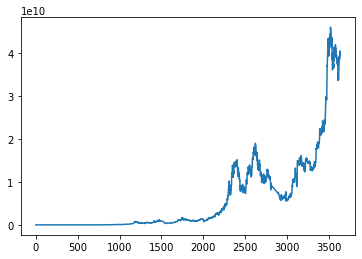

In [88]:
btc_rial['btc_rial'].plot()

In [89]:
btc_rial

,Date,btc_rial
0,2014-09-17,1.483630e+07
2,2014-09-19,1.271054e+07
3,2014-09-20,1.314562e+07
4,2014-09-21,1.278563e+07
5,2014-09-22,1.294710e+07
...,...,...
3628,2024-07-28,4.001494e+10
3629,2024-07-29,4.038447e+10
3630,2024-07-30,3.972998e+10
3631,2024-07-31,3.998141e+10


In [90]:
gold_price = gold_price[['Date', 'Close']]

In [91]:
gold_price.set_index('Date', inplace=True)

In [93]:
gold_price.to_excel('gold.xlsx')

In [94]:
btc_rial.to_excel('btc.xlsx')